<a href="https://colab.research.google.com/github/ngupta23/ds7337_nlp/blob/master/Homework/NGupta_homework3_withstopwords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read Data

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip

--2020-06-02 11:19:35--  https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84188 (82K) [application/x-httpd-php]
Saving to: ‘sentiment labelled sentences.zip.3’

sentiment labelled  100%[===================>]  82.21K  --.-KB/s    in 0.09s   

2020-06-02 11:19:35 (945 KB/s) - ‘sentiment labelled sentences.zip.3’ saved [84188/84188]



In [2]:
!unzip 'sentiment labelled sentences.zip'

Archive:  sentiment labelled sentences.zip
replace sentiment labelled sentences/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: sentiment labelled sentences/.DS_Store  
  inflating: __MACOSX/sentiment labelled sentences/._.DS_Store  
  inflating: sentiment labelled sentences/amazon_cells_labelled.txt  
  inflating: sentiment labelled sentences/imdb_labelled.txt  
  inflating: __MACOSX/sentiment labelled sentences/._imdb_labelled.txt  
  inflating: sentiment labelled sentences/readme.txt  
  inflating: __MACOSX/sentiment labelled sentences/._readme.txt  
  inflating: sentiment labelled sentences/yelp_labelled.txt  
  inflating: __MACOSX/._sentiment labelled sentences  


In [0]:
import os
from typing import List, Tuple
import numpy as np
import pandas as pd

In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
from sklearn.model_selection import train_test_split

In [6]:
files = ['amazon_cells_labelled.txt', 'yelp_labelled.txt', 'imdb_labelled.txt']
parent_dir = 'sentiment labelled sentences'
dfs = [pd.read_csv(os.path.join(parent_dir, file), delimiter='\t', header=None) for file in files]
len(dfs)

3

In [7]:
# Combine all data sets
data = pd.concat(dfs)
data.columns = ['Sentence','Sentiment']
data.reset_index(inplace=True, drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   2748 non-null   object
 1   Sentiment  2748 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 43.1+ KB


In [8]:
data.head()

,Sentence,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [9]:
data.tail()

,Sentence,Sentiment
2743,I just got bored watching Jessice Lange take h...,0
2744,"Unfortunately, any virtue in this film's produ...",0
2745,"In a word, it is embarrassing.",0
2746,Exceptionally bad!,0
2747,All in all its an insult to one's intelligence...,0


**Looks like the data is evenly distributed between both positive and negative sentiment**

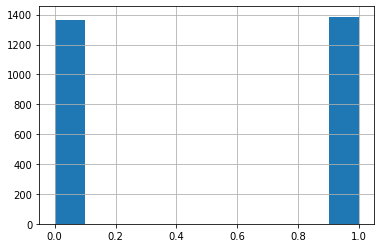

In [10]:
data['Sentiment'].hist()

# Preprocessing

* [Reference](https://dzone.com/articles/simple-sentiment-analysis-with-nlp)

In [11]:
for i in range(5):
  print(data.iloc[i]['Sentence'])

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!
The mic is great.


In [0]:
#Text Preprocessing
# Lower string
data['Sentence'] = data['Sentence'].str.lower()

# Remove punctaitions and special chracters
data['Sentence'] = data['Sentence'].str.replace('[^\w\s]','')

# # Remove numbers (omitted from this version per class discussion)
# # Reasons: 
# # (1) They can have a large range (vocabulary will unnecessarily increase)
# # (2) They dont add much to determine the polarity of the sentiment (e.g. if a review contains 45, does it mean that the review is positive or negative?)
# data['Sentence'] = data['Sentence'].replace('\d', '', regex=True)

In [13]:
for i in range(5):
  print(data.iloc[i]['Sentence'])

so there is no way for me to plug it in here in the us unless i go by a converter
good case excellent value
great for the jawbone
tied to charger for conversations lasting more than 45 minutesmajor problems
the mic is great


It is not perfect. You can see that "minutes.MAJOR" has been converted to a single token "minutesmajor", when it should have been 2 tokens. But this is still better than the original text.

In [0]:
# Tokenize
# Remove Stop Words (using nltk)  --> ommitted from this version per class discussion
df_ = pd.DataFrame(columns=data.columns)

for index, row in data.iterrows():
    word_tokens = word_tokenize(row['Sentence'])
    #filtered_sentence = [w for w in word_tokens if not w in stopwords.words('english')]
    filtered_sentence = [w for w in word_tokens]
    df_ = df_.append({"Sentiment":  row['Sentiment'], "Sentence": " ".join(filtered_sentence[0:])}, ignore_index=True)

data = df_

In [15]:
for i in range(5):
  print(data.iloc[i]['Sentence'])

so there is no way for me to plug it in here in the us unless i go by a converter
good case excellent value
great for the jawbone
tied to charger for conversations lasting more than 45 minutesmajor problems
the mic is great


# EDA

In [16]:
data['len'] = data['Sentence'].str.split().str.len()
data.head()

,Sentence,Sentiment,len
0,so there is no way for me to plug it in here i...,0,21
1,good case excellent value,1,4
2,great for the jawbone,1,4
3,tied to charger for conversations lasting more...,0,11
4,the mic is great,1,4


In [17]:
print('Maximum review length: {}'.format(data['len'].max()))
print('Minimum review length: {}'.format(data['len'].min()))

Maximum review length: 1384
Minimum review length: 1


In [18]:
# Keep a large percentage of reviews completely and chop of the remainig reviews off.
import numpy as np
time_steps = int(np.quantile(data['len'],0.90))
time_steps

22

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6a9d27be0>]],
      dtype=object)

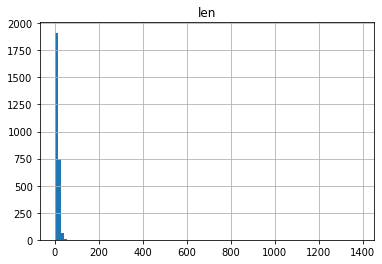

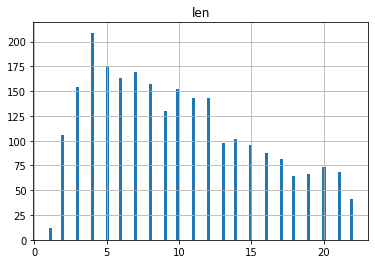

In [19]:
data.hist(bins=100)
data[data['len'] <= time_steps].hist(bins=100)

# Train Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    data['Sentence'].values.astype('U'),
    data['Sentiment'].values.astype('int32'),
    test_size=0.20,
    random_state=42
)

print(f"Number of samples: X_train: {len(X_train)}, y_train: {len(y_train)}")
print(f"Number of samples: X_test: {len(X_test)}, y_test: {len(y_test)}")

Number of samples: X_train: 2198, y_train: 2198
Number of samples: X_test: 550, y_test: 550


In [21]:
# Checking split --> both test and train contain roughly the same number of positive (and negative) sentiment reviews
print(sum(y_train == 1)/len(y_train))
print(sum(y_test == 1)/len(y_test))

0.5104640582347588
0.48


In [22]:
X_train[:5]

array(['dont go here',
       'there are many continuity errors one other user commented on different cars in the garage joes glassesthe one that got to me the most was the fact joes facial hair configuration seemed to change from scene to scene',
       'we thought youd have to venture further away to get good sushi but this place really hit the spot that night',
       'this is an excellent film',
       'the keyboard is really worthwhile in usefulness and is sturdy enough i dont expect any problems'],
      dtype='<U7476')

# Vocabulary

In [23]:
reviews_corpus = []
for _, row in enumerate(X_train):
  reviews_corpus = reviews_corpus + row.split(" ")

print(reviews_corpus[:30])

['dont', 'go', 'here', 'there', 'are', 'many', 'continuity', 'errors', 'one', 'other', 'user', 'commented', 'on', 'different', 'cars', 'in', 'the', 'garage', 'joes', 'glassesthe', 'one', 'that', 'got', 'to', 'me', 'the', 'most', 'was', 'the', 'fact']


In [24]:
# Get only words that have occured more than once to remove noise, spelling mistakes and possible tokenization errors.
fdist = nltk.FreqDist(reviews_corpus)
print(fdist.most_common()[:20])
vocab = [word for word, count in fdist.most_common() if count >= 1]
print(vocab[:20])

[('the', 1597), ('and', 919), ('a', 746), ('i', 716), ('is', 614), ('it', 555), ('this', 537), ('to', 529), ('of', 524), ('was', 469), ('in', 332), ('for', 274), ('not', 256), ('that', 241), ('with', 216), ('my', 208), ('very', 208), ('on', 192), ('good', 187), ('great', 175)]
['the', 'and', 'a', 'i', 'is', 'it', 'this', 'to', 'of', 'was', 'in', 'for', 'not', 'that', 'with', 'my', 'very', 'on', 'good', 'great']


In [25]:
len(vocab)

4830

# Encoding and Decoding Dictionary

In [0]:
word_index = {}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
for index, word in enumerate(vocab):
  word_index[word] = index+3

In [27]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
[(i, reverse_word_index.get(i)) for i in np.arange(10)]

[(0, '<PAD>'),
 (1, '<START>'),
 (2, '<UNK>'),
 (3, 'the'),
 (4, 'and'),
 (5, 'a'),
 (6, 'i'),
 (7, 'is'),
 (8, 'it'),
 (9, 'this')]

In [28]:
vocabulary_size = len(word_index.keys())
vocabulary_size

4833

In [0]:
def encode_review(plain_text: str) -> List[int]:
  return [word_index[token] if token in word_index.keys() else word_index["<UNK>"] for token in plain_text.split(" ")]

def decode_review(encoded_text):
  return ' '.join([reverse_word_index.get(i, '?') for i in encoded_text])

In [0]:
def encode_decode_check(original_review):
  print("\n")
  print(f"Original Review: ")
  print(original_review)
  encoded_review = encode_review(original_review)
  print(f"Encoded Review: {encoded_review}")
  decoded_review = decode_review(encoded_review)
  print(f"Decoded Review: {decoded_review}")
  same = decoded_review == original_review
  print(f"Decoded = Original: {same}")

**Observations:**

1. Train Reviews and test reviews have UNK tokens introduced for words not in the vocabulary, but apart from this, they match up.

In [31]:
random_train_reviews = X_train[np.random.choice(len(X_train), 5)]
random_train_reviews

for review in random_train_reviews:
  encode_decode_check(review)



Original Review: 
the cutouts and buttons are placed perfectly
Encoded Review: [3, 1483, 4, 511, 28, 1484, 417]
Decoded Review: the cutouts and buttons are placed perfectly
Decoded = Original: True


Original Review: 
if she had not rolled the eyes we may have stayed not sure if we will go back and try it again
Encoded Review: [51, 194, 35, 15, 4828, 3, 655, 53, 432, 26, 1000, 15, 292, 51, 53, 76, 78, 71, 4, 302, 8, 114]
Decoded Review: if she had not rolled the eyes we may have stayed not sure if we will go back and try it again
Decoded = Original: True


Original Review: 
it has a very good plot it holds your complete attention the acting is superb tom wilkinson was fantastic and emily watson was also very good
Encoded Review: [8, 58, 5, 19, 21, 188, 8, 1496, 59, 861, 768, 3, 125, 7, 884, 731, 1644, 12, 285, 4, 3100, 3101, 12, 69, 19, 21]
Decoded Review: it has a very good plot it holds your complete attention the acting is superb tom wilkinson was fantastic and emily watson was al

In [32]:
random_test_reviews = X_test[np.random.choice(len(X_test), 5)]
random_test_reviews

for review in random_test_reviews:
  encode_decode_check(review)



Original Review: 
today is the second time ive been to their lunch buffet and it was pretty good
Encoded Review: [521, 7, 3, 758, 43, 82, 103, 10, 93, 480, 607, 4, 8, 12, 119, 21]
Decoded Review: today is the second time ive been to their lunch buffet and it was pretty good
Decoded = Original: True


Original Review: 
no one at the table thought the food was above average or worth the wait that we had for it
Encoded Review: [67, 37, 39, 3, 512, 231, 3, 40, 12, 963, 699, 61, 180, 3, 334, 16, 53, 35, 14, 8]
Decoded Review: no one at the table thought the food was above average or worth the wait that we had for it
Decoded = Original: True


Original Review: 
i ordered this product first and was unhappy with it immediately
Encoded Review: [6, 277, 9, 105, 107, 4, 12, 4378, 17, 8, 4066]
Decoded Review: i ordered this product first and was unhappy with it immediately
Decoded = Original: True


Original Review: 
i purcashed this for the car charger and it does not work
Encoded Review: [6, 2

In [0]:
X_train_encoded = [encode_review(review) for review in X_train]
X_test_encoded = [encode_review(review) for review in X_test]

In [0]:
from tensorflow.keras.preprocessing import sequence

X_train_encoded = sequence.pad_sequences(X_train_encoded, maxlen=time_steps)
X_test_encoded = sequence.pad_sequences(X_test_encoded, maxlen=time_steps)

In [35]:
X_train_encoded[0:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,   60,   78,   66],
       [1938,   37,   16,  129,   10,   79,    3,  137,   12,    3,  360,
        1221, 1939,  910, 1940,  627,   10, 1222,   48,  399,   10,  399],
       [   0,   53,  231,  628,   26,   10, 1941, 1223,  361,   10,   90,
          21,  362,   24,    9,   42,   46,  548,    3,  481,   16,  247],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    9,    7,   49,  112,   33],
       [   0,    0,    0,    0,    0,    0,    3,  911,    7,   46,  912,
          13, 1942,    4,    7,  750,  130,    6,   60,  363,   85,  286]],
      dtype=int32)

In [36]:
X_test_encoded[0:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    3,    2,
         506,  175,  863,  137,   11,    3,   33,    7,   49,    2, 1116],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           9,   12,   37,   11,    3,  144,  187,    6,   26,   73,  189],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    3, 1652,    7,   41,  304, 4043,    4,   19,  104],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          26,  103,  132,  263,    2,    4,  148,  462,   58,  103,  254],
       [   0,    0,    0,    3,  125,    7,   44,  201, 3150, 1550, 1689,
         223,    4, 1129,   48,    5,  679,  272,   95,   50,    8,    7]],
      dtype=int32)

# Models

In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout
from tensorflow.keras.layers import SimpleRNN as RNN
from tensorflow.keras.layers import LSTM as LSTM
from tensorflow.keras.layers import GRU as GRU

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_metrics(history: tf.python.keras.callbacks.History, metrics: List[str] = ['loss'], figsize: Tuple[int, int] = (10,4), title: str = "Train/Test Curves", titlefontsize:int = 14):
  """
  This functin will plot the metrics for the model
  :param history: The history object obtained from the fit function.
  :type history: tf.python.keras.callbacks.History
  :param metrics: What metrics to plot for the model (Default = ['loss'])
  :type metrics: List[str]
  :param figsize: Figure size to be used for plotting (Default = (10,4))
  :type figsize: Tuple(int,int)
  """
  num_plots = len(metrics)
  fig, axes = plt.subplots(int(num_plots/2), 2, figsize=figsize)

  for num, metric in enumerate(metrics):
    # summarize history for metric
    if num <= 2:
      axes[num%2].plot(history.history[metric])
      axes[num%2].plot(history.history['val_' + metric])
      axes[num%2].set_title('Model ' + metric)
      axes[num%2].set(xlabel='Epoch', ylabel=metric)
      axes[num%2].legend(['train', 'val'], loc='best')    
    else:
      axes[floor(num/2), num%2].plot(history.history[metric])
      axes[floor(num/2), num%2].plot(history.history['val_' + metric])
      axes[floor(num/2), num%2].set_title('Model ' + metric)
      axes[floor(num/2), num%2].set(xlabel='Epoch', ylabel=metric)
      axes[floor(num/2), num%2].legend(['train', 'val'], loc='best')

  plt.suptitle(title, fontsize=titlefontsize, y=1.02)    
  plt.tight_layout()
  _ = plt.show

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
# If validation error does not improve for 10 epochs, then terminate the training
es = EarlyStopping(min_delta=0,patience=10)

In [0]:
# import other libs as needed for building model
from tensorflow.keras.callbacks import ModelCheckpoint

# add a checkpoint to save the lowest validation loss
filepath = '.'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, 
                             save_best_only=True, save_weights_only=False, 
                             mode='auto', save_frequency=1)

In [0]:
def create_model(vocabulary_size: int, time_steps: int, embedding_size: int, type: str = 'lstm', num_neuron: int=100, dropout: float=0) -> tf.keras.layers.Layer:
  """
  Creates a Sequence Model with the passed parameters
  :param vocabulary_size Size of the Vocabulary
  :type vocabulary_size int
  :param time_steps Number of steps in the sequence (e.g. length of sentence)
  :type time_steps int
  :param embedding_size Size of the Embedding 
  :type embedding_size int
  :param type Type of sequence model (Options: 'simple_rnn', 'lstm' or 'gru' (Default: 'lstm')
  :type type str
  :param num_neuron Number of neurons to be passed to the "cell"
  :type num_neuron int
  :param dropout Amount of dropout to use
  :type dropout float
  :rtype tf.keras.layers.Layer
  """
  model = Sequential()
  model.add(Embedding(vocabulary_size, embedding_size, input_length=time_steps))
  if type.lower() == 'simple_rnn':
    model.add(RNN(num_neuron))
  elif type.lower() == 'lstm':
    model.add(LSTM(num_neuron))
  elif type.lower() == 'gru':
    model.add(GRU(num_neuron))
  else:
    sys.exit("You have not passed the right argument for type.")
  model.add(Dropout(dropout))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

def create_simple_rnn_model(vocabulary_size: int, time_steps: int, embedding_size: int, num_neuron: int=100, dropout: float=0) -> tf.keras.layers.Layer:
  """
  Creates a Simple RNN Model with the passed parameters
  :param vocabulary_size Size of the Vocabulary
  :type vocabulary_size int
  :param time_steps Number of steps in the sequence (e.g. length of sentence)
  :type time_steps int
  :param embedding_size Size of the Embedding 
  :type embedding_size int
  :param num_neuron Number of neurons to be passed to the "cell"
  :type num_neuron int
  :param dropout Amount of dropout to use
  :type dropout float
  :rtype tf.keras.layers.Layer
  """
  model = create_model(vocabulary_size, time_steps, embedding_size, 'simple_rnn', num_neuron, dropout)
  return model

def create_lstm_model(vocabulary_size: int, time_steps: int, embedding_size: int, num_neuron: int=100, dropout: float=0) -> tf.keras.layers.Layer:
  """
  Creates a LSTM Model with the passed parameters
  :param vocabulary_size Size of the Vocabulary
  :type vocabulary_size int
  :param time_steps Number of steps in the sequence (e.g. length of sentence)
  :type time_steps int
  :param embedding_size Size of the Embedding 
  :type embedding_size int
  :param num_neuron Number of neurons to be passed to the "cell"
  :type num_neuron int
  :param dropout Amount of dropout to use
  :type dropout float
  :rtype tf.keras.layers.Layer
  """
  model = create_model(vocabulary_size, time_steps, embedding_size, 'lstm', num_neuron, dropout)
  return model

def create_gru_model(vocabulary_size: int, time_steps: int, embedding_size: int, num_neuron: int=100, dropout: float=0) -> tf.keras.layers.Layer:
  """
  Creates a GRU Model with the passed parameters
  :param vocabulary_size Size of the Vocabulary
  :type vocabulary_size int
  :param time_steps Number of steps in the sequence (e.g. length of sentence)
  :type time_steps int
  :param embedding_size Size of the Embedding 
  :type embedding_size int
  :param num_neuron Number of neurons to be passed to the "cell"
  :type num_neuron int
  :param dropout Amount of dropout to use
  :type dropout float
  :rtype tf.keras.layers.Layer
  """
  model = create_model(vocabulary_size, time_steps, embedding_size, 'gru', num_neuron, dropout)
  return model

**We will use a grid search approach to find the best set of hyperparameters / architectures to model this data**

In [0]:
num_combinations = 20 # Number of hyperparameter combinations

## RNN





---------------------------------------------------------------------------
Training model for hyperparameter combination 1:
Min occurances to be included in Vocab: 3 --> Vocabulary Size: 1220
Quantile: 0.9593085973720465 --> Time Steps: 27
Embedding Size: 24, Num Neurons: 47, Dropout: 0.3118764001091077
---------------------------------------------------------------------------


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 27, 24)            29280     
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 47)                3384      
_________________________________________________________________
dropout (Dropout)            (None, 47)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 48       

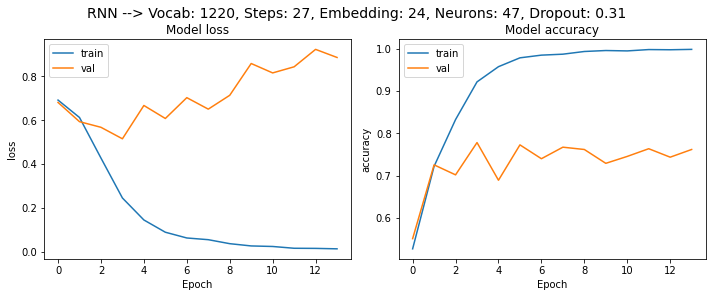

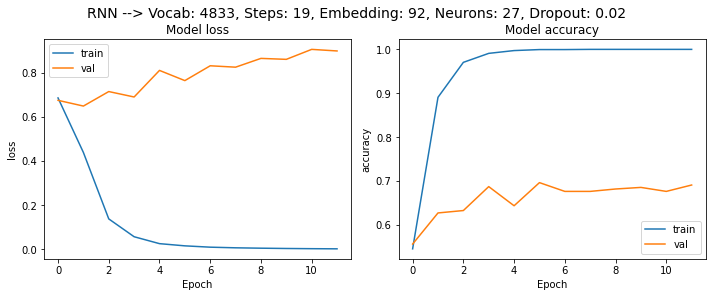

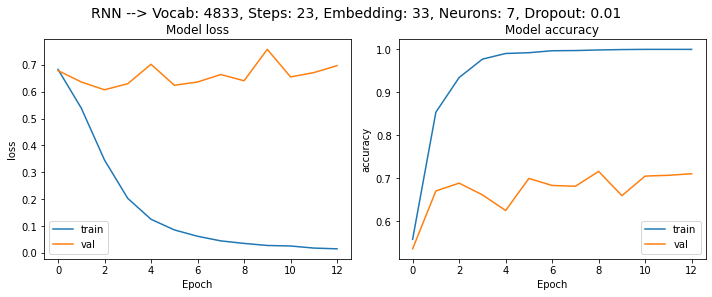

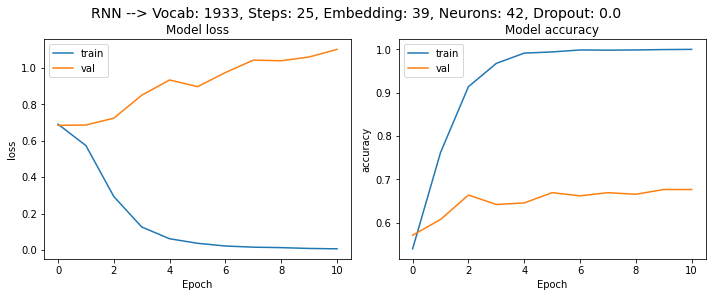

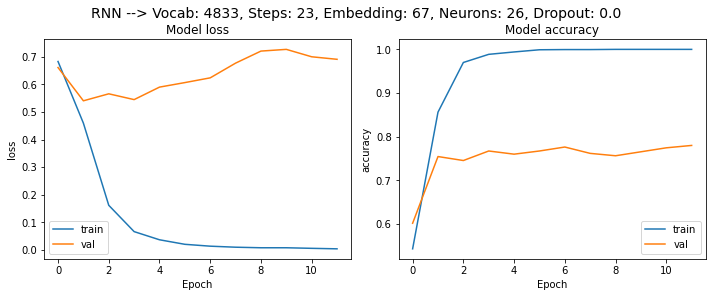

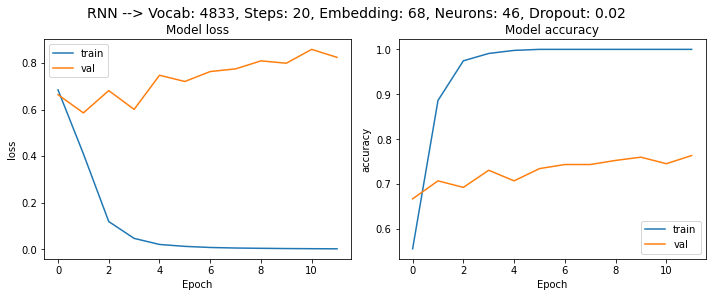

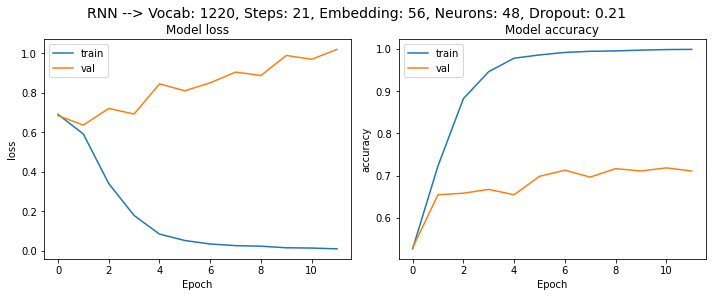

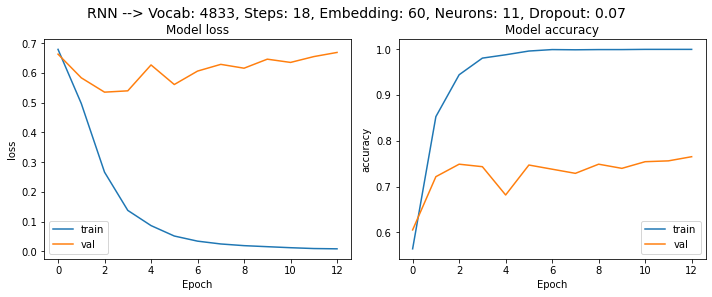

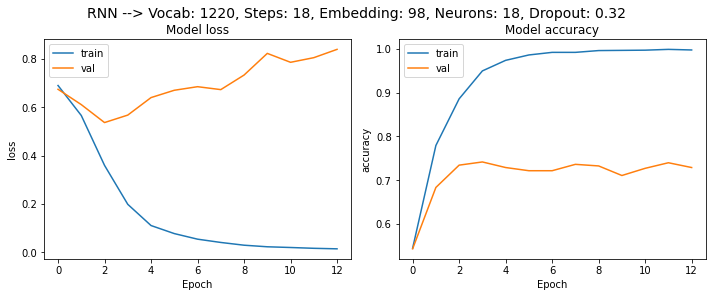

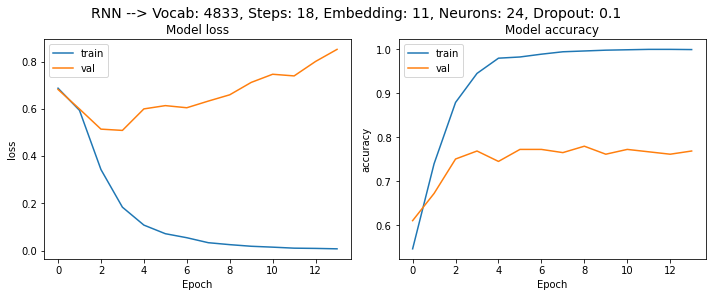

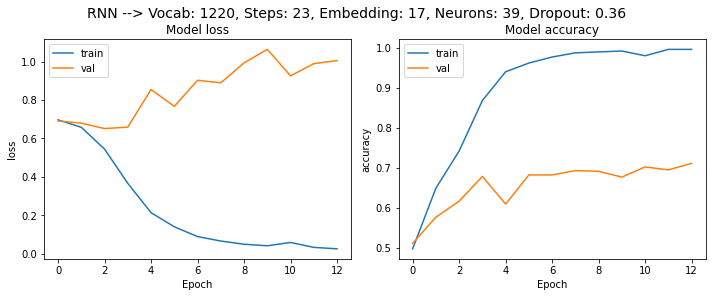

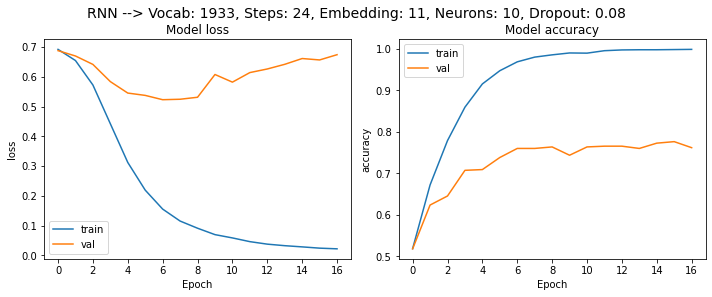

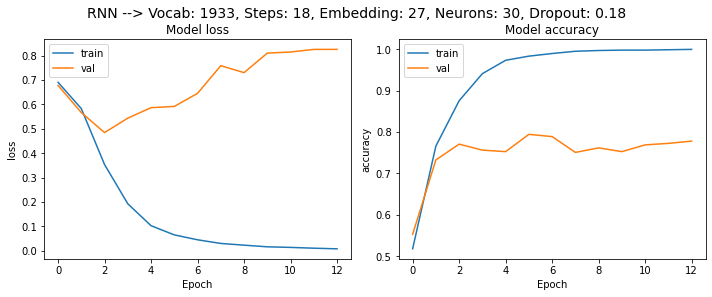

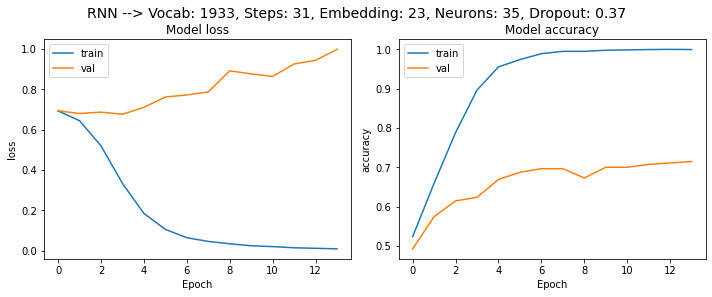

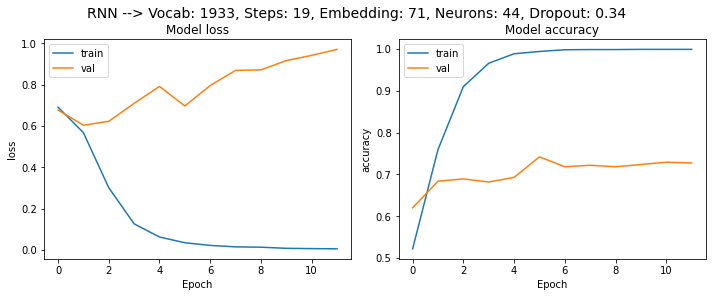

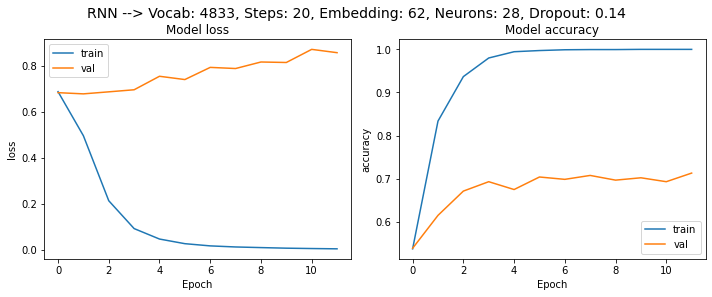

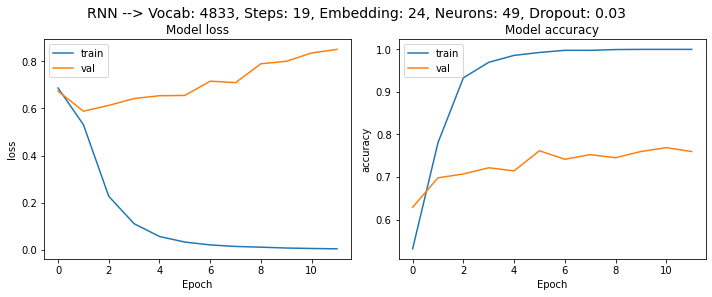

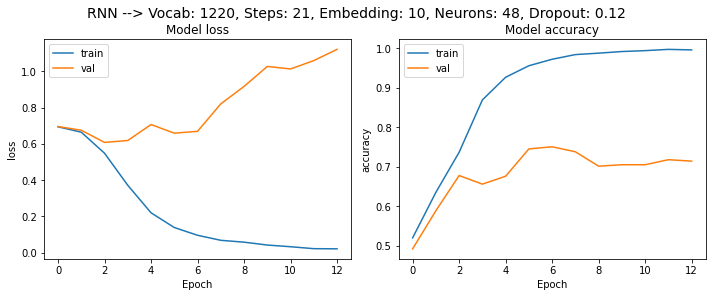

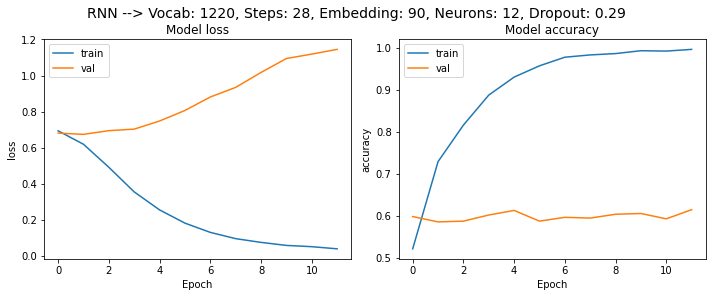

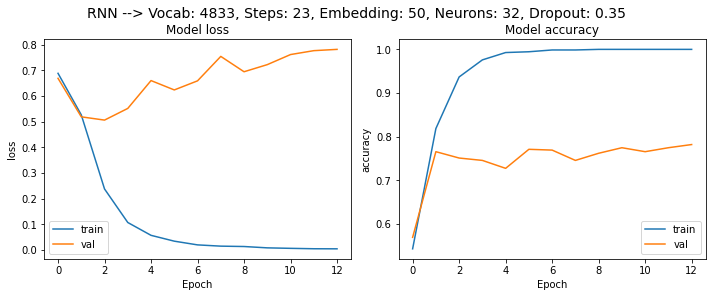

In [43]:
# Random Grid Search 
np.random.seed(42)
tf.random.set_seed(42)

vocab_sizes = []
num_time_steps = []
histories = []
models = []
embedding_sizes = []
num_neurons = []
dropouts = []

for hyper_index in np.arange(num_combinations):
 
  # Random Sample Hyperparameter Space
  min_words = np.random.randint(1, 4)
  quantile = np.random.uniform(0.8, 1.00) 
  embeding_size = np.random.randint(10, 100)
  num_neuron = np.random.randint(5, 50)
  dropout = np.random.uniform(0, 0.4)

  # Define Vocabulary
  vocab = [word for word, count in fdist.most_common() if count >= min_words]
  
  # Word Index and Reverse Index
  word_index = {}
  word_index["<PAD>"] = 0
  word_index["<START>"] = 1
  word_index["<UNK>"] = 2
  for index, word in enumerate(vocab):
    word_index[word] = index+3
  reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

  # Vocabulary Size and Time Steps
  vocabulary_size = len(word_index.keys())
  time_steps = int(np.quantile(data['len'], quantile))

  # Encoding of reviews
  X_train_encoded = [encode_review(review) for review in X_train]
  X_test_encoded = [encode_review(review) for review in X_test]

  # Padding of reviews
  X_train_encoded = sequence.pad_sequences(X_train_encoded, maxlen=time_steps)
  X_test_encoded = sequence.pad_sequences(X_test_encoded, maxlen=time_steps)  

  print("\n\n\n")
  print("-"*75)
  print(f"Training model for hyperparameter combination {hyper_index+1}:")
  print(f"Min occurances to be included in Vocab: {min_words} --> Vocabulary Size: {vocabulary_size}")
  print(f"Quantile: {quantile} --> Time Steps: {time_steps}")
  print(f"Embedding Size: {embeding_size}, Num Neurons: {num_neuron}, Dropout: {dropout}")
  print("-"*75)
  print("\n")

  # Build Model and Train
  model = create_simple_rnn_model(vocabulary_size=vocabulary_size, embedding_size=embeding_size, time_steps=time_steps, num_neuron=num_neuron, dropout=dropout)
  print(model.summary())
  history = model.fit(X_train_encoded, y_train, validation_data=(X_test_encoded, y_test), epochs=50, batch_size=32, callbacks=[es, checkpoint])
  plot_metrics(history,
               metrics=['loss', 'accuracy'],
               title = f"RNN --> Vocab: {vocabulary_size}, Steps: {time_steps}, Embedding: {embeding_size}, Neurons: {num_neuron}, Dropout: {round(dropout,2)}")


  # Housekeeping
  vocab_sizes.append(vocabulary_size)
  num_time_steps.append(time_steps)
  histories.append(history)
  models.append(model)
  embedding_sizes.append(embeding_size)
  num_neurons.append(num_neuron)
  dropouts.append(dropout)

In [44]:
best_train_accuracies = [max(history.history['accuracy']) for history in histories]
best_test_accuracies = [max(history.history['val_accuracy']) for history in histories]
print(f"Train Accuracies: {best_train_accuracies}")
print(f"Test Accuracies: {best_test_accuracies}")

Train Accuracies: [0.9986351132392883, 1.0, 1.0, 0.9995450377464294, 1.0, 1.0, 0.9990900754928589, 1.0, 0.9986351132392883, 1.0, 0.9954504370689392, 0.9986351132392883, 1.0, 0.9995450377464294, 0.9990900754928589, 1.0, 1.0, 0.9972702264785767, 0.995905339717865, 1.0]
Test Accuracies: [0.778181791305542, 0.696363627910614, 0.7163636088371277, 0.6763636469841003, 0.7799999713897705, 0.7636363506317139, 0.7181817889213562, 0.7654545307159424, 0.7418181896209717, 0.7799999713897705, 0.7109090685844421, 0.7763636112213135, 0.7945454716682434, 0.7145454287528992, 0.7418181896209717, 0.7127272486686707, 0.7690908908843994, 0.7509090900421143, 0.614545464515686, 0.7818182110786438]


In [45]:
rnn_results = pd.DataFrame({
    'vocab_size': vocab_sizes,
    'time_steps': num_time_steps,
    'embedding_size':embedding_sizes,
    'num_neuron': num_neurons,
    'dropout': dropouts,
    'best_train_acc': best_train_accuracies,
    'best_test_acc': best_test_accuracies
  })
rnn_results

,vocab_size,time_steps,embedding_size,num_neuron,dropout,best_train_acc,best_test_acc
0,1220,27,24,47,0.311876,0.998635,0.778182
1,4833,19,92,27,0.023233,1.000000,0.696364
2,4833,23,33,7,0.008234,1.000000,0.716364
3,1933,25,39,42,0.000312,0.999545,0.676364
4,4833,23,67,26,0.002827,1.000000,0.780000
5,4833,20,68,46,0.018666,1.000000,0.763636
6,1220,21,56,48,0.205694,0.999090,0.718182
7,4833,18,60,11,0.068210,1.000000,0.765455
8,1220,18,98,18,0.323359,0.998635,0.741818
9,4833,18,11,24,0.096410,1.000000,0.780000


## LSTM





---------------------------------------------------------------------------
Training model for hyperparameter combination 1:
Min occurances to be included in Vocab: 3 --> Vocabulary Size: 1220
Quantile: 0.9593085973720465 --> Time Steps: 27
Embedding Size: 24, Num Neurons: 47, Dropout: 0.3118764001091077
---------------------------------------------------------------------------


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 27, 24)            29280     
_________________________________________________________________
lstm (LSTM)                  (None, 47)                13536     
_________________________________________________________________
dropout_20 (Dropout)         (None, 47)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 48    

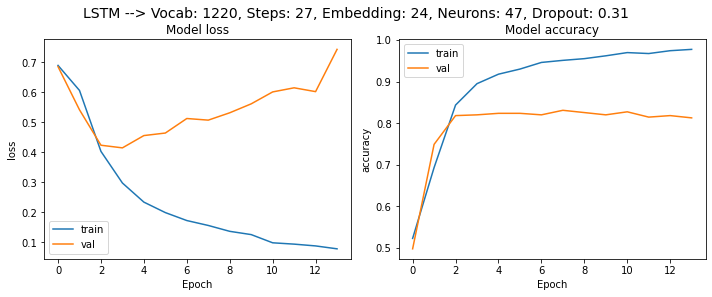

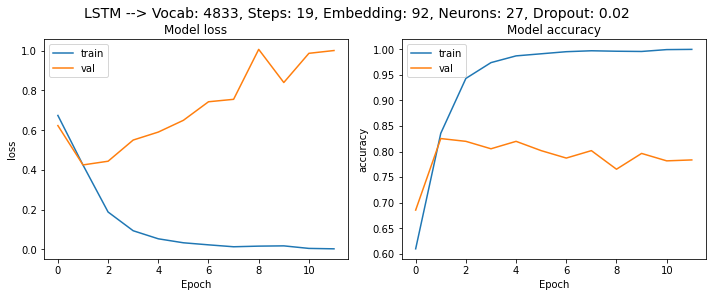

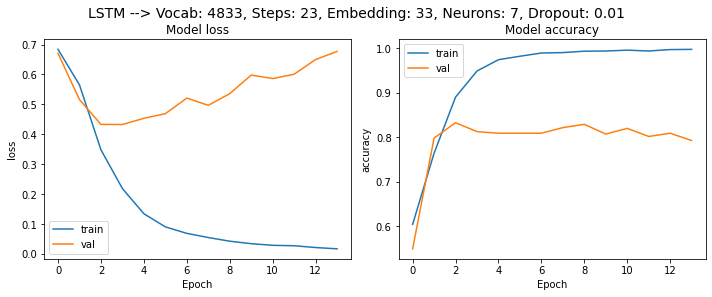

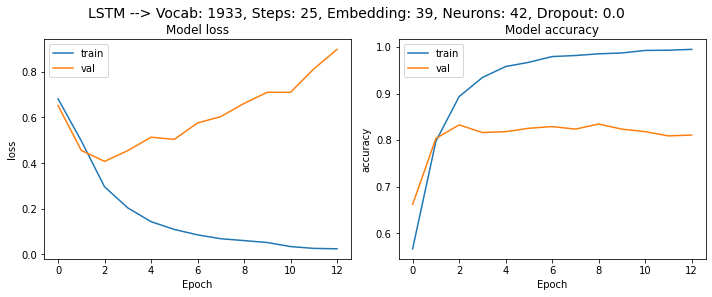

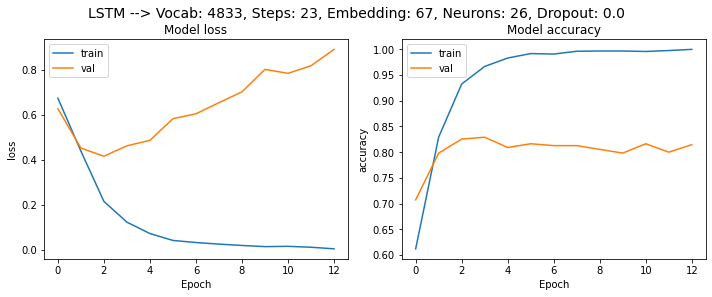

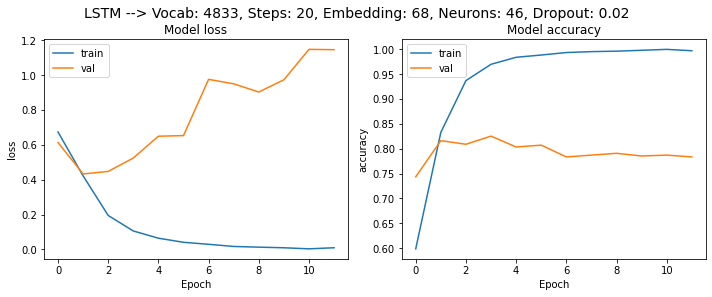

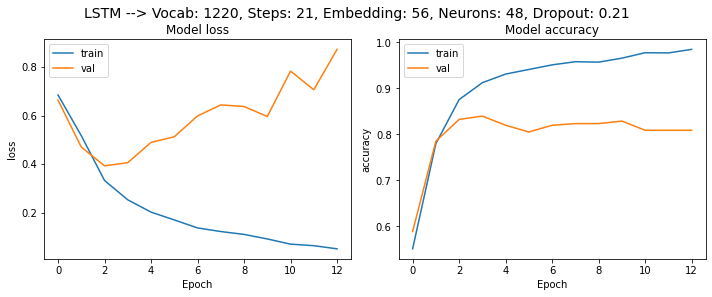

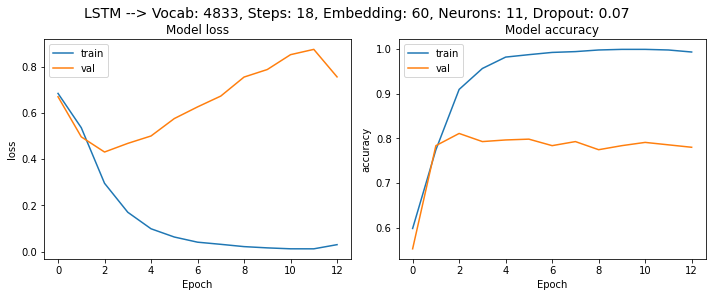

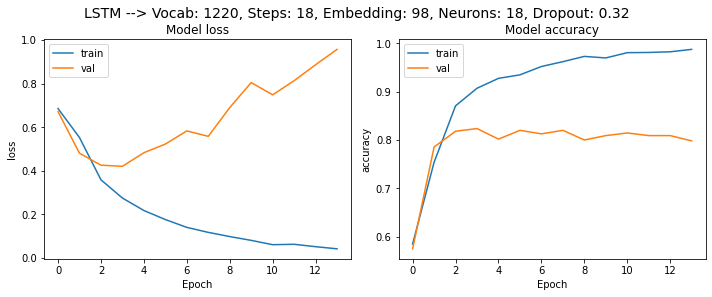

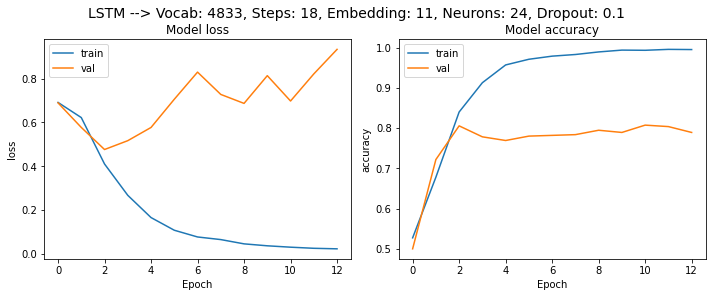

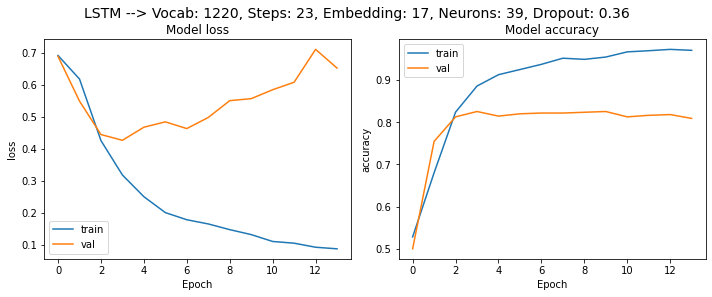

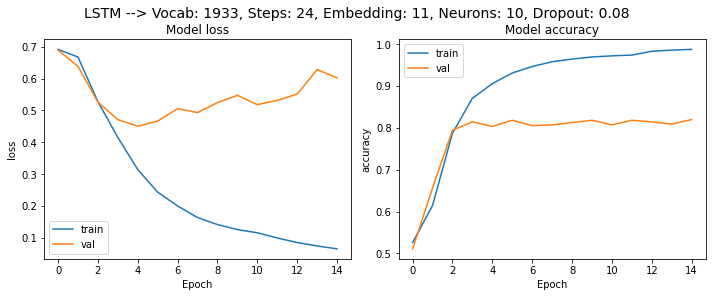

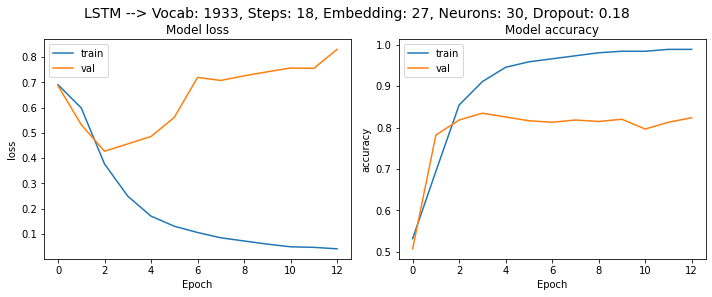

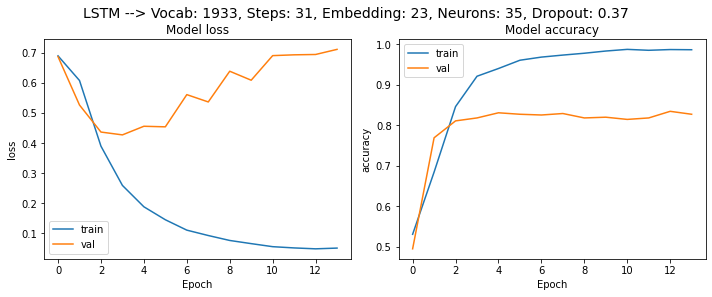

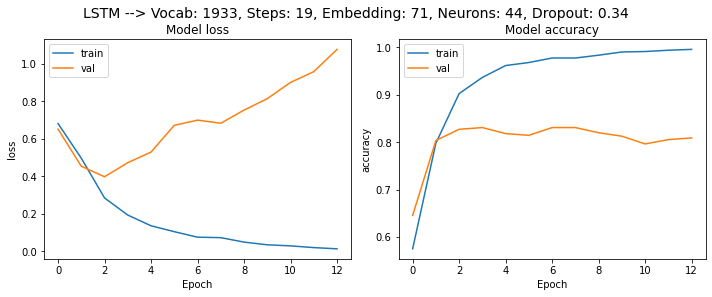

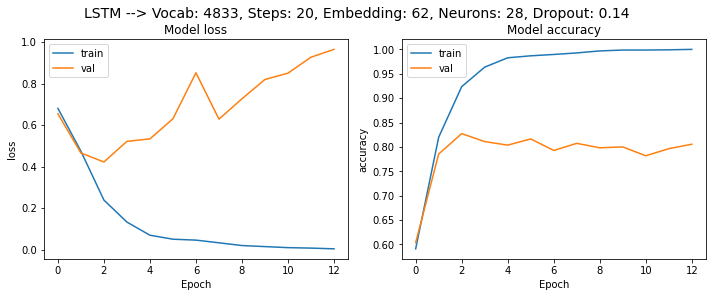

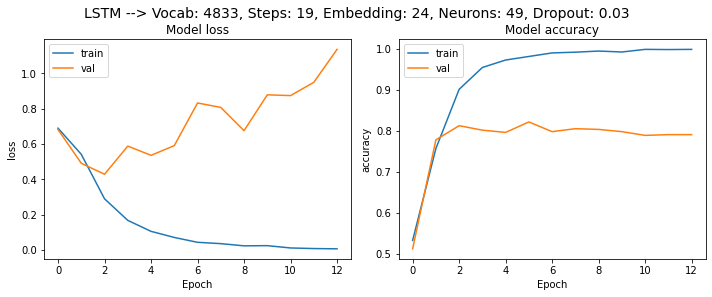

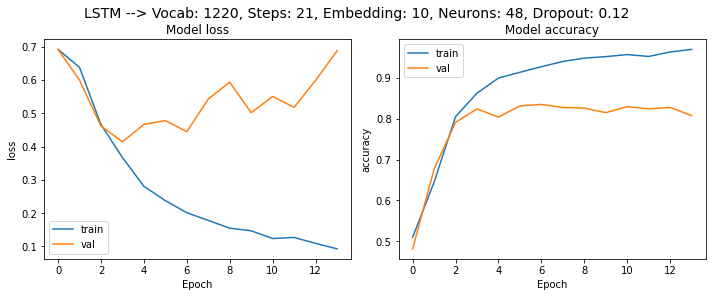

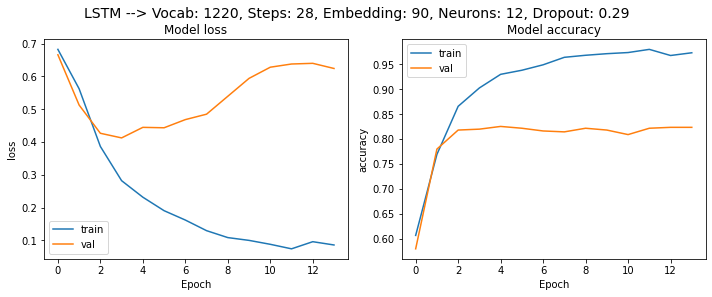

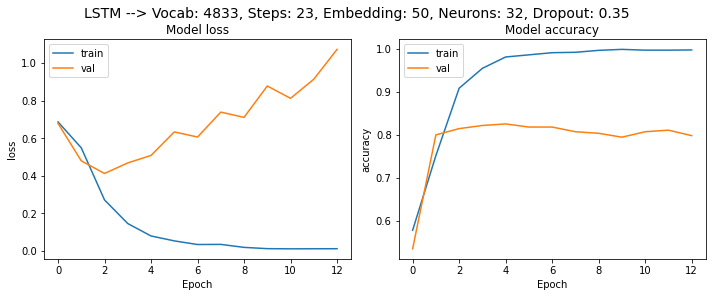

In [46]:
# Random Grid Search 
np.random.seed(42)
tf.random.set_seed(42)

vocab_sizes = []
num_time_steps = []
histories = []
models = []
embedding_sizes = []
num_neurons = []
dropouts = []

for hyper_index in np.arange(num_combinations):
 
  # Random Sample Hyperparameter Space
  min_words = np.random.randint(1, 4)
  quantile = np.random.uniform(0.8, 1.00) 
  embeding_size = np.random.randint(10, 100)
  num_neuron = np.random.randint(5, 50)
  dropout = np.random.uniform(0, 0.4)

  # Define Vocabulary
  vocab = [word for word, count in fdist.most_common() if count >= min_words]
  
  # Word Index and Reverse Index
  word_index = {}
  word_index["<PAD>"] = 0
  word_index["<START>"] = 1
  word_index["<UNK>"] = 2
  for index, word in enumerate(vocab):
    word_index[word] = index+3
  reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

  # Vocabulary Size and Time Steps
  vocabulary_size = len(word_index.keys())
  time_steps = int(np.quantile(data['len'], quantile))

  # Encoding of reviews
  X_train_encoded = [encode_review(review) for review in X_train]
  X_test_encoded = [encode_review(review) for review in X_test]

  # Padding of reviews
  X_train_encoded = sequence.pad_sequences(X_train_encoded, maxlen=time_steps)
  X_test_encoded = sequence.pad_sequences(X_test_encoded, maxlen=time_steps)  

  print("\n\n\n")
  print("-"*75)
  print(f"Training model for hyperparameter combination {hyper_index+1}:")
  print(f"Min occurances to be included in Vocab: {min_words} --> Vocabulary Size: {vocabulary_size}")
  print(f"Quantile: {quantile} --> Time Steps: {time_steps}")
  print(f"Embedding Size: {embeding_size}, Num Neurons: {num_neuron}, Dropout: {dropout}")
  print("-"*75)
  print("\n")

  # Build Model and Train
  model = create_lstm_model(vocabulary_size=vocabulary_size, embedding_size=embeding_size, time_steps=time_steps, num_neuron=num_neuron, dropout=dropout)
  print(model.summary())
  history = model.fit(X_train_encoded, y_train, validation_data=(X_test_encoded, y_test), epochs=50, batch_size=32, callbacks=[es, checkpoint])
  plot_metrics(history,
               metrics=['loss', 'accuracy'],
               title = f"LSTM --> Vocab: {vocabulary_size}, Steps: {time_steps}, Embedding: {embeding_size}, Neurons: {num_neuron}, Dropout: {round(dropout,2)}")

  # Housekeeping
  vocab_sizes.append(vocabulary_size)
  num_time_steps.append(time_steps)
  histories.append(history)
  models.append(model)
  embedding_sizes.append(embeding_size)
  num_neurons.append(num_neuron)
  dropouts.append(dropout)

In [47]:
best_train_accuracies = [max(history.history['accuracy']) for history in histories]
best_test_accuracies = [max(history.history['val_accuracy']) for history in histories]
print(f"Train Accuracies: {best_train_accuracies}")
print(f"Test Accuracies: {best_test_accuracies}")

Train Accuracies: [0.9772520661354065, 1.0, 0.9977251887321472, 0.9949954748153687, 1.0, 1.0, 0.9849863648414612, 0.9990900754928589, 0.9877160787582397, 0.9954504370689392, 0.9727024435997009, 0.9877160787582397, 0.9886260032653809, 0.9877160787582397, 0.995905339717865, 1.0, 0.9986351132392883, 0.9690628051757812, 0.9799817800521851, 0.9990900754928589]
Test Accuracies: [0.8309090733528137, 0.8254545331001282, 0.8327272534370422, 0.8345454335212708, 0.8290908932685852, 0.8254545331001282, 0.8399999737739563, 0.8109090924263, 0.8236363530158997, 0.807272732257843, 0.8254545331001282, 0.8199999928474426, 0.8345454335212708, 0.8345454335212708, 0.8309090733528137, 0.8272727131843567, 0.8218181729316711, 0.8345454335212708, 0.8254545331001282, 0.8254545331001282]


In [48]:
lstm_results = pd.DataFrame({
    'vocab_size': vocab_sizes,
    'time_steps': num_time_steps,
    'embedding_size':embedding_sizes,
    'num_neuron': num_neurons,
    'dropout': dropouts,
    'best_train_acc': best_train_accuracies,
    'best_test_acc': best_test_accuracies
  })
lstm_results

,vocab_size,time_steps,embedding_size,num_neuron,dropout,best_train_acc,best_test_acc
0,1220,27,24,47,0.311876,0.977252,0.830909
1,4833,19,92,27,0.023233,1.000000,0.825455
2,4833,23,33,7,0.008234,0.997725,0.832727
3,1933,25,39,42,0.000312,0.994995,0.834545
4,4833,23,67,26,0.002827,1.000000,0.829091
5,4833,20,68,46,0.018666,1.000000,0.825455
6,1220,21,56,48,0.205694,0.984986,0.840000
7,4833,18,60,11,0.068210,0.999090,0.810909
8,1220,18,98,18,0.323359,0.987716,0.823636
9,4833,18,11,24,0.096410,0.995450,0.807273


## GRU





---------------------------------------------------------------------------
Training model for hyperparameter combination 1:
Min occurances to be included in Vocab: 3 --> Vocabulary Size: 1220
Quantile: 0.9593085973720465 --> Time Steps: 27
Embedding Size: 24, Num Neurons: 47, Dropout: 0.3118764001091077
---------------------------------------------------------------------------


Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_40 (Embedding)     (None, 27, 24)            29280     
_________________________________________________________________
gru (GRU)                    (None, 47)                10293     
_________________________________________________________________
dropout_40 (Dropout)         (None, 47)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 48    

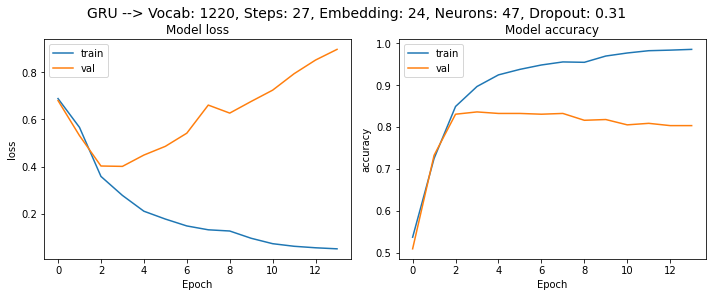

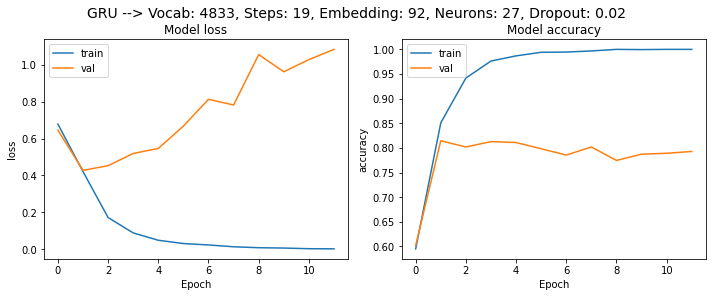

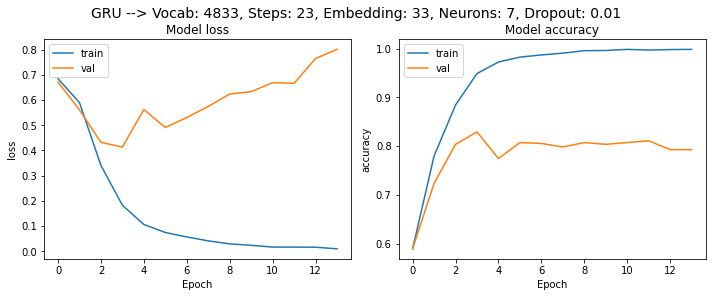

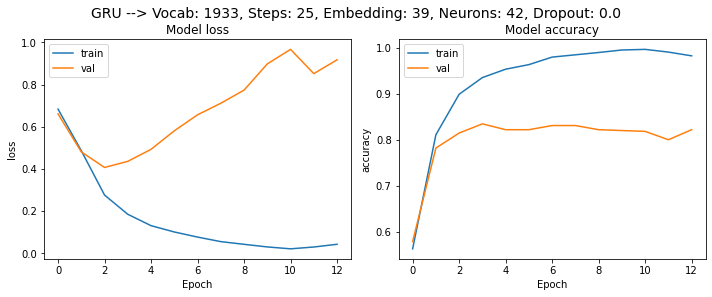

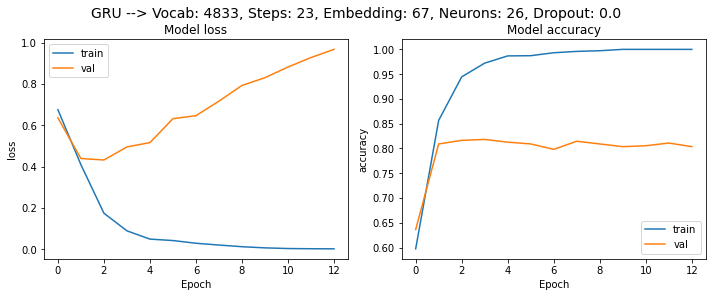

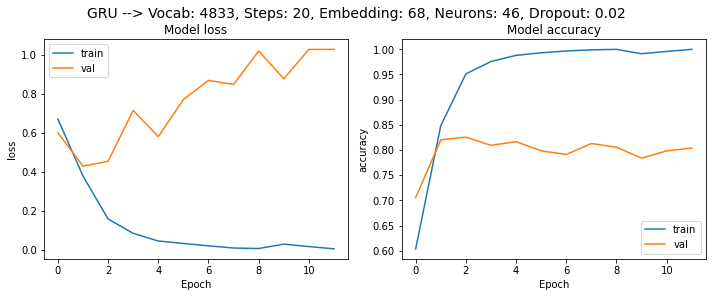

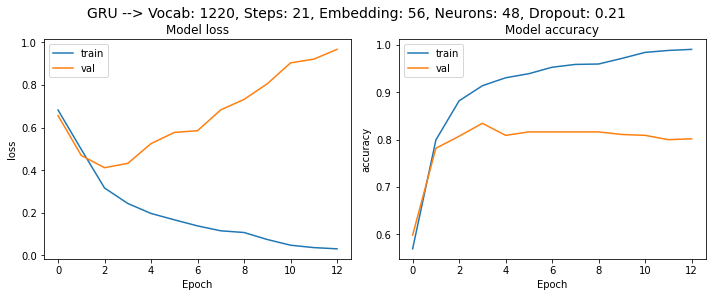

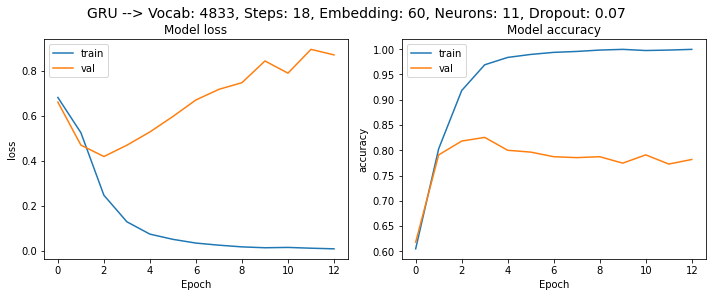

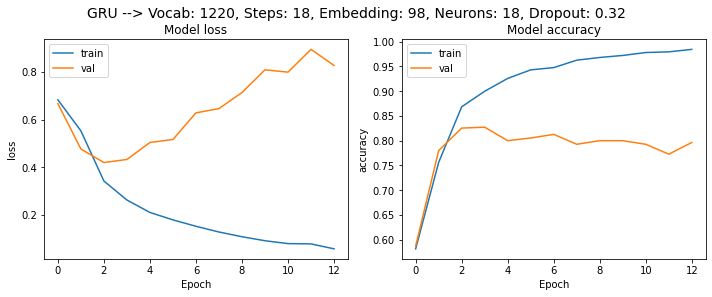

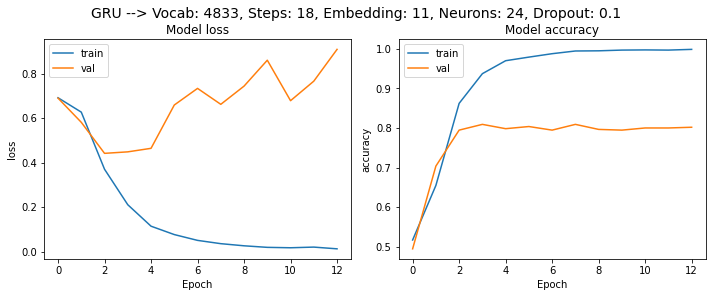

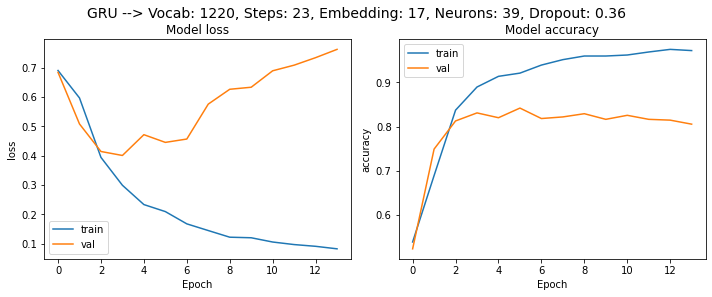

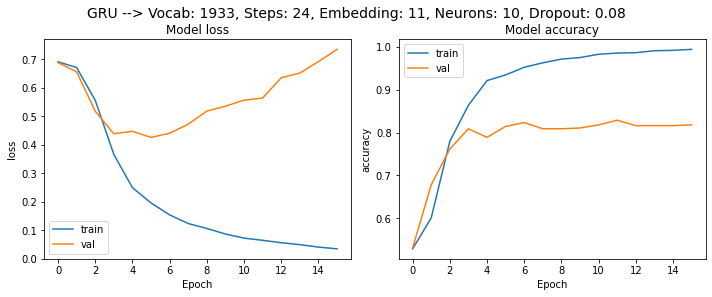

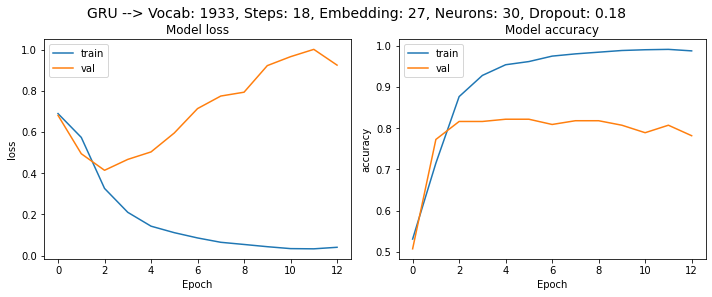

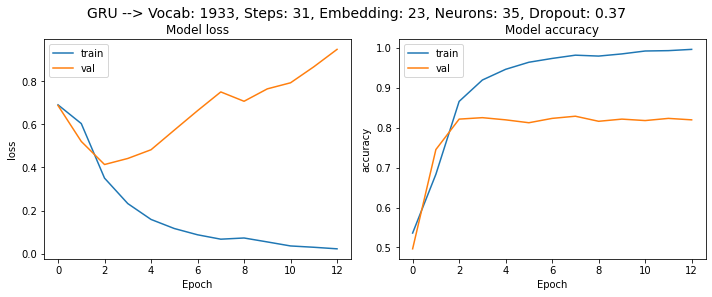

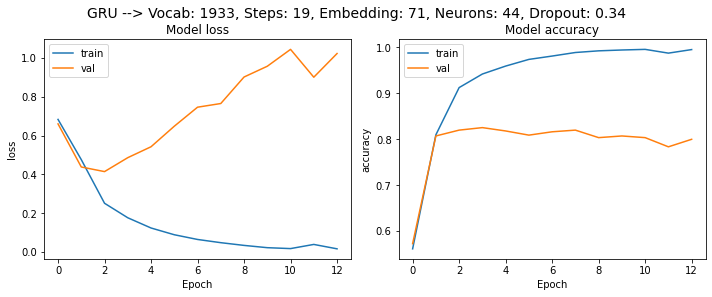

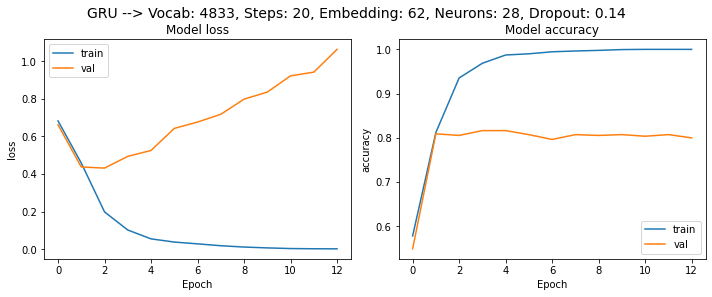

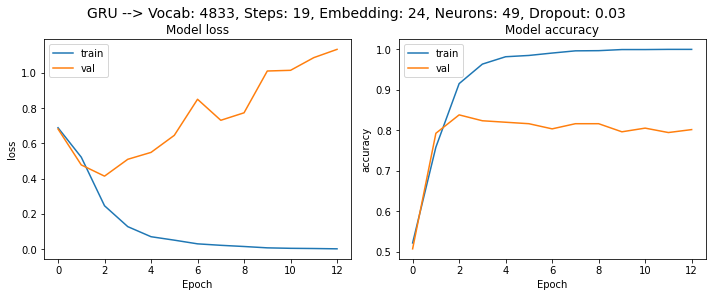

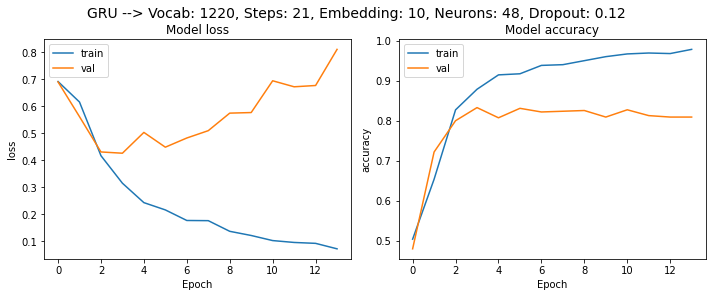

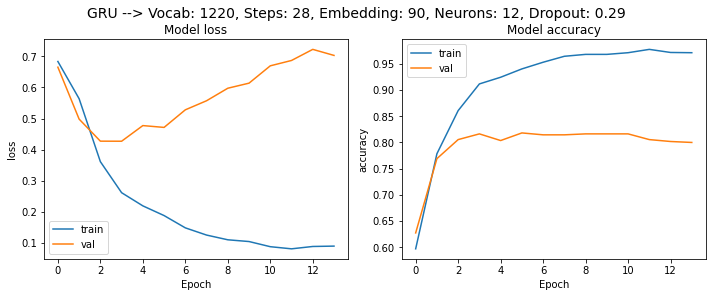

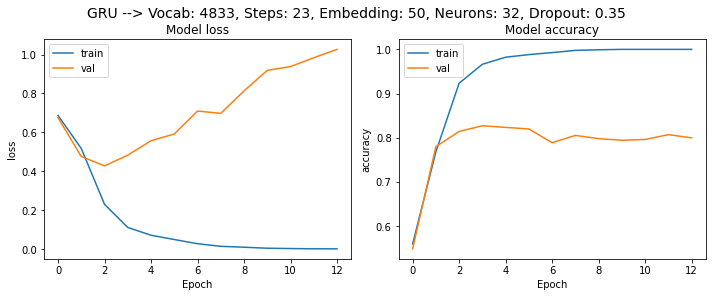

In [49]:
# Random Grid Search 
np.random.seed(42)
tf.random.set_seed(42)

vocab_sizes = []
num_time_steps = []
histories = []
models = []
embedding_sizes = []
num_neurons = []
dropouts = []

for hyper_index in np.arange(num_combinations):
 
  # Random Sample Hyperparameter Space
  min_words = np.random.randint(1, 4)
  quantile = np.random.uniform(0.8, 1.00) 
  embeding_size = np.random.randint(10, 100)
  num_neuron = np.random.randint(5, 50)
  dropout = np.random.uniform(0, 0.4)

  # Define Vocabulary
  vocab = [word for word, count in fdist.most_common() if count >= min_words]
  
  # Word Index and Reverse Index
  word_index = {}
  word_index["<PAD>"] = 0
  word_index["<START>"] = 1
  word_index["<UNK>"] = 2
  for index, word in enumerate(vocab):
    word_index[word] = index+3
  reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

  # Vocabulary Size and Time Steps
  vocabulary_size = len(word_index.keys())
  time_steps = int(np.quantile(data['len'], quantile))

  # Encoding of reviews
  X_train_encoded = [encode_review(review) for review in X_train]
  X_test_encoded = [encode_review(review) for review in X_test]

  # Padding of reviews
  X_train_encoded = sequence.pad_sequences(X_train_encoded, maxlen=time_steps)
  X_test_encoded = sequence.pad_sequences(X_test_encoded, maxlen=time_steps)  

  print("\n\n\n")
  print("-"*75)
  print(f"Training model for hyperparameter combination {hyper_index+1}:")
  print(f"Min occurances to be included in Vocab: {min_words} --> Vocabulary Size: {vocabulary_size}")
  print(f"Quantile: {quantile} --> Time Steps: {time_steps}")
  print(f"Embedding Size: {embeding_size}, Num Neurons: {num_neuron}, Dropout: {dropout}")
  print("-"*75)
  print("\n")

  # Build Model and Train
  model = create_gru_model(vocabulary_size=vocabulary_size, embedding_size=embeding_size, time_steps=time_steps, num_neuron=num_neuron, dropout=dropout)
  print(model.summary())
  history = model.fit(X_train_encoded, y_train, validation_data=(X_test_encoded, y_test), epochs=50, batch_size=32, callbacks=[es, checkpoint])
  plot_metrics(history,
               metrics=['loss', 'accuracy'],
               title = f"GRU --> Vocab: {vocabulary_size}, Steps: {time_steps}, Embedding: {embeding_size}, Neurons: {num_neuron}, Dropout: {round(dropout,2)}")

  # Housekeeping
  vocab_sizes.append(vocabulary_size)
  num_time_steps.append(time_steps)
  histories.append(history)
  models.append(model)
  embedding_sizes.append(embeding_size)
  num_neurons.append(num_neuron)
  dropouts.append(dropout)

In [50]:
best_train_accuracies = [max(history.history['accuracy']) for history in histories]
best_test_accuracies = [max(history.history['val_accuracy']) for history in histories]
print(f"Train Accuracies: {best_train_accuracies}")
print(f"Test Accuracies: {best_test_accuracies}")

Train Accuracies: [0.9858962893486023, 1.0, 0.9986351132392883, 0.9968152642250061, 1.0, 0.9995450377464294, 0.9909008145332336, 0.9995450377464294, 0.9845314025878906, 0.9986351132392883, 0.9745222926139832, 0.9945405125617981, 0.9913557767868042, 0.9968152642250061, 0.995905339717865, 1.0, 1.0, 0.9781619906425476, 0.977707028388977, 1.0]
Test Accuracies: [0.8363636136054993, 0.8145454525947571, 0.8290908932685852, 0.8345454335212708, 0.8181818127632141, 0.8254545331001282, 0.8345454335212708, 0.8254545331001282, 0.8272727131843567, 0.8090909123420715, 0.8418181538581848, 0.8290908932685852, 0.8218181729316711, 0.8290908932685852, 0.8254545331001282, 0.8163636326789856, 0.8381817936897278, 0.8327272534370422, 0.8181818127632141, 0.8272727131843567]


In [51]:
gru_results = pd.DataFrame({
    'vocab_size': vocab_sizes,
    'time_steps': num_time_steps,
    'embedding_size':embedding_sizes,
    'num_neuron': num_neurons,
    'dropout': dropouts,
    'best_train_acc': best_train_accuracies,
    'best_test_acc': best_test_accuracies
  })
gru_results

,vocab_size,time_steps,embedding_size,num_neuron,dropout,best_train_acc,best_test_acc
0,1220,27,24,47,0.311876,0.985896,0.836364
1,4833,19,92,27,0.023233,1.000000,0.814545
2,4833,23,33,7,0.008234,0.998635,0.829091
3,1933,25,39,42,0.000312,0.996815,0.834545
4,4833,23,67,26,0.002827,1.000000,0.818182
5,4833,20,68,46,0.018666,0.999545,0.825455
6,1220,21,56,48,0.205694,0.990901,0.834545
7,4833,18,60,11,0.068210,0.999545,0.825455
8,1220,18,98,18,0.323359,0.984531,0.827273
9,4833,18,11,24,0.096410,0.998635,0.809091


## Results (Summary)

In [52]:
best_rnn_acc = rnn_results.sort_values("best_test_acc", ascending=False).iloc[0]["best_test_acc"]
best_lstm_acc = lstm_results.sort_values("best_test_acc", ascending=False).iloc[0]["best_test_acc"]
best_gru_acc = gru_results.sort_values("best_test_acc", ascending=False).iloc[0]["best_test_acc"]
print(f"Best RNN Test Accuracy: {best_rnn_acc}")
print(f"Best LSRM Test Accuracy: {best_lstm_acc}")
print(f"Best GRU Test Accuracy: {best_gru_acc}")

Best RNN Test Accuracy: 0.7945454716682434
Best LSRM Test Accuracy: 0.8399999737739563
Best GRU Test Accuracy: 0.8418181538581848


In [53]:
rnn_results.groupby("vocab_size")['best_test_acc'].agg('mean')

vocab_size
1220    0.719091
1933    0.740727
4833    0.751717
Name: best_test_acc, dtype: float64

In [54]:
lstm_results.groupby("vocab_size")['best_test_acc'].agg('mean')

vocab_size
1220    0.830000
1933    0.830909
4833    0.822828
Name: best_test_acc, dtype: float64

In [55]:
gru_results.groupby("vocab_size")['best_test_acc'].agg('mean')

vocab_size
1220    0.831818
1933    0.828000
4833    0.822626
Name: best_test_acc, dtype: float64

# Observations:

1. LSTM (best results test accuracy = 84.00%) and GRU (best results test accuracy = 84.18%) outperformed the Vanilla RNN (best results test accuracy = 79.45%) by more than 4%.
2. For RNN, the full vocabulary size tended to perform better, whereas in the case of more complex networks such as LSTM and GRU, a larger vocabulary size led to a slight degradation in the test accuracies. This could be a result of overfitting.
3. Not shown here, but a version of this notebook was also created with stop words removed and it did not tend to perform as well as the case when stop words were included in the vocabulary (this notebook). In the best case, there was an improvement of about 2.5% in LSTM and GRU and about 1.5% in RNN (when stop words were included in the vocabulary vs. when they were removed).